# 1. Introduction


*1.1 Project Objective* 
- To develop a robust machine learning model to accurately classify handwritten digits from the MNIST dataset, thereby enhancing digit recognition systems.

*1.2 Project Scope*
- The project involves data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and deployment. The focus will be on improving model accuracy and efficiency using various machine learning algorithms.

# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
np.random.seed(0)

# Data Overview

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits, each represented as a 28x28 pixel grayscale image.

# Visualize Examples

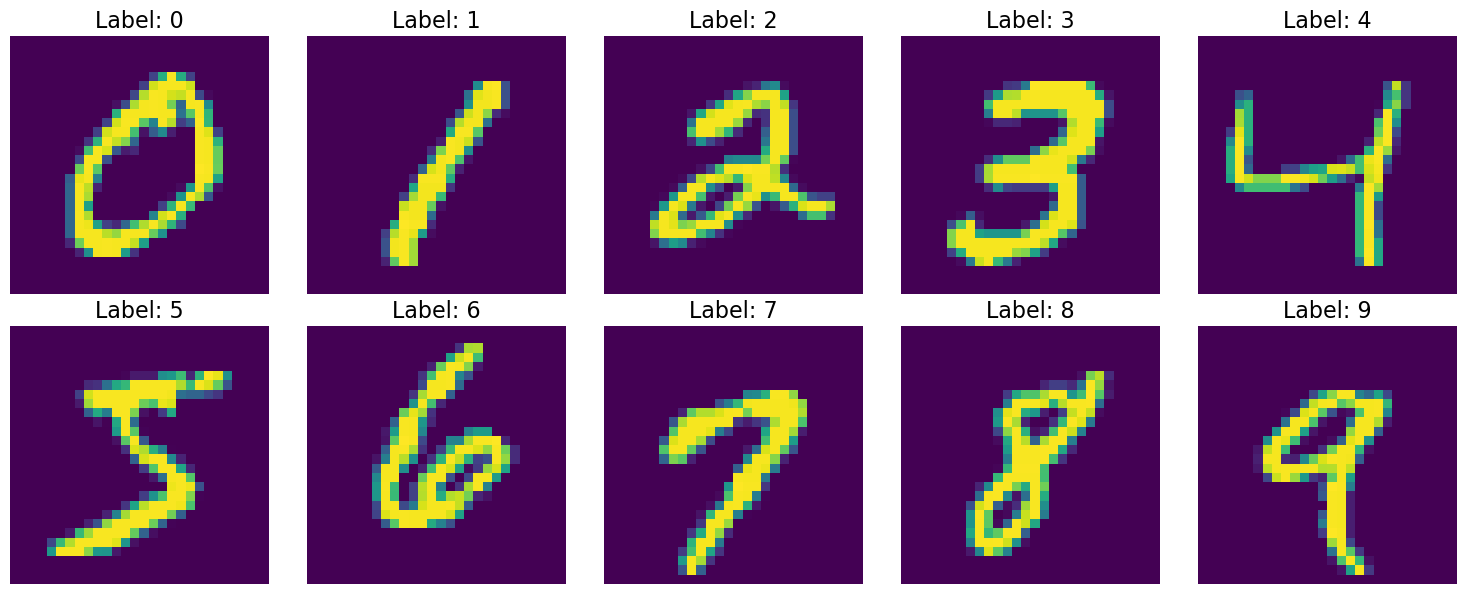

In [33]:
num_classes = 10
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(num_classes):
    ax = axs[i // 5, i % 5] 
    ax.imshow(x_train[y_train == i][0])  
    ax.set_title("Label: {}".format(i), fontsize=16) 
    ax.axis('off') 
plt.tight_layout()
plt.show()


In [36]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Initial Observations
- Images are uniformly sized (28x28 pixels).
- Labels are evenly distributed across all digit classes.
- Potential noise in handwritten digit images.

# Data Preparation

 ## Normalization

In [5]:

x_train = x_train / 255.0
x_test = x_test / 255.0

## Reshape Data

In [6]:

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print(x_train.shape)

(60000, 784)


In [19]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Model Development

In [7]:

model_metrics = {
    'model': [],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
   
}


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score,roc_curve

pipelines = {
    'Random Forest': Pipeline([('rf', RandomForestClassifier(random_state=42))]),
    'KNeighbors': Pipeline([('knn', KNeighborsClassifier())]),
    'Decision Tree': Pipeline([('dt', DecisionTreeClassifier(random_state=42))]),
    'Bagging Classifier': Pipeline([('bag', BaggingClassifier(base_estimator=SGDClassifier(random_state=42, n_jobs=-1, max_iter=1500),
                                               random_state=42, n_jobs=-1))]),
    'SGD Classifier': Pipeline([('sgd', SGDClassifier(random_state=42))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
        
    print(f"The model: {name}")
    print('Accuracy Score  ', accuracy_score(y_test, y_pred))
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    model_metrics['model'].append(f'{name} ')
    model_metrics['accuracy'].append( accuracy_score(y_test, y_pred).round(2)*100)
    model_metrics['f1_score'].append(f1_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['precision'].append(precision_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['recall'].append(recall_score(y_test, y_pred, average='weighted').round(2)*100)
    model_metrics['confusion matrix'].append(confusion_matrix(y_test, y_pred).tolist())

The model: Random Forest
Accuracy Score   0.9704
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5 

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The model: Bagging Classifier
Accuracy Score   0.9184
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.94      0.94      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.86      0.87       974
           9       0.92      0.87      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion Matrix
[[ 959    0    2    2    0    6    5    4    1    1]
 [   0 1109    3    2    0    2    4    1   14    0]
 [   8    6  943   11    7    3   10   10 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grids for each model
param_grids = {
    'Random Forest': {'rf__n_estimators': [100, 200, 300], 'rf__max_depth': [None, 5, 10, 20]},
    'KNeighbors': {'knn__n_neighbors': [3, 5, 7]},
    'Decision Tree': {'dt__max_depth': [None, 5, 10, 20]},
    'Bagging Classifier': {'bag__n_estimators': [10, 50, 100], 'bag__base_estimator__alpha': [0.0001, 0.001, 0.01]},
    'SGD Classifier': {'sgd__alpha': [0.0001, 0.001, 0.01]}
}

# Perform hyperparameter tuning for each model
best_params = {}
best_scores = {}
for name, pipeline in pipelines.items():
    random_search = RandomizedSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1, n_iter=10)
    random_search.fit(x_train, y_train)
    best_params[name] = random_search.best_params_
    best_scores[name] = random_search.best_score_

print("Best Parameters for each model:")
for name, params in best_params.items():
    print(f"{name}: {params}")
print("\n")
print("Best Scores for each model:")
for name, score in best_scores.items():
    print(f"{name}: {score}")


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


# CNN

In [9]:
import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.models import Sequential



model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [10]:

epochs=13
model.fit(x=x_train, y=y_train,  epochs=epochs)

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8681 - loss: 0.4507
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.1185
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9758 - loss: 0.0785
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0575
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9841 - loss: 0.0485
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0420
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0351
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0301
Epoch 9/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0239
Epoch 10/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0248
Epoch 11/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0230
Epoch 12/13
1875/1875 ━━━━━━━━

In [11]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  



print('Accuracy Score  ', accuracy_score(y_test, y_pred_classes))
print('Classification Report')
print(classification_report(y_test, y_pred_classes))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_classes))
print("\n")

model_metrics['model'].append('CNN')
model_metrics['accuracy'].append(accuracy_score(y_test, y_pred_classes).round(2)*100)
model_metrics['f1_score'].append(f1_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['precision'].append(precision_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['recall'].append(recall_score(y_test, y_pred_classes, average='weighted').round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(y_test, y_pred_classes).tolist())




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy Score   0.9792
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix
[[ 973    1    1    0    1    0    2    0    1    1]
 [   0 1126    2    2    0    1    2    0    2    0]
 [   4    3  999    8    3    0

## Implementation

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


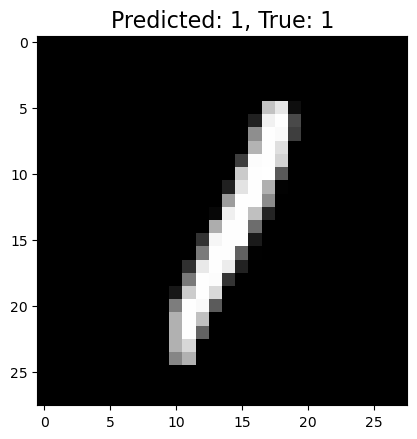

In [14]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.show()


# model comparision

In this project, we evaluated multiple machine learning models to classify handwritten digits from the MNIST dataset. The models tested included Convolutional Neural Networks (CNN), Random Forest, K-Nearest Neighbors (KNN), Bagging Classifier, Stochastic Gradient Descent (SGD) Classifier, and Decision Trees.

In [15]:
model_metrics_df=pd.DataFrame(model_metrics)
model_metrics_df.set_index('model',inplace=True)
model_metrics_df.sort_values(by='accuracy',ascending=False)

,f1_score,accuracy,precision,recall,confusion matrix
model,,,,,
CNN,98.0,98.0,98.0,98.0,"[[973, 1, 1, 0, 1, 0, 2, 0, 1, 1], [0, 1126, 2..."
Random Forest,97.0,97.0,97.0,97.0,"[[971, 0, 0, 0, 0, 2, 3, 1, 3, 0], [0, 1127, 2..."
KNeighbors,97.0,97.0,97.0,97.0,"[[974, 1, 1, 0, 0, 1, 2, 1, 0, 0], [0, 1133, 2..."
Bagging Classifier,92.0,92.0,92.0,92.0,"[[959, 0, 2, 2, 0, 6, 5, 4, 1, 1], [0, 1109, 3..."
SGD Classifier,92.0,92.0,92.0,92.0,"[[956, 0, 2, 2, 0, 3, 12, 3, 1, 1], [0, 1112, ..."
Decision Tree,88.0,88.0,88.0,88.0,"[[914, 1, 7, 4, 6, 9, 16, 5, 8, 10], [0, 1084,..."


- CNN achieved the highest performance with an accuracy and F1 score of 98%, making it the most effective model for this classification task.
- Random Forest and KNN also performed very well, each achieving 97% accuracy and F1 scores.
- Bagging Classifier and SGD Classifier showed moderate performance with 92% accuracy and F1 scores.
- Decision Tree had the lowest performance with 88% accuracy and F1 scores.

# Conclusion

- CNN is recommended for deployment due to its superior performance.
- Random Forest and KNN are viable alternatives if computational resources are a constraint, as they offer high accuracy with potentially lower computational cost compared to CNNs.

#  Challenges

In [16]:
%store model_metrics

Stored 'model_metrics' (dict)
